<a href="https://colab.research.google.com/github/arthurzaneti/pytorch-fundamentals/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

We are gonna go trough:
1. "data (prepare and load)",
2. "build model",
3. "fitting the model to data(training)"
4. "making predicions and evaluating a model"
5. "save and reload"

In [1]:
import torch
from torch import nn #neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## Data: preparing and loading

Data is a REALLY genneral term in ML, so it can be almost anything

We'll use a linear regression formula to make a straight lne with known parameters.

In [2]:
# Creating *known* parameters

weight = 0.7
bias = 0.3

# Create the values
X = torch.arange(0, 1, 0.02).unsqueeze(dim = 1)
y = weight * X + bias

In [3]:
torch.hstack((X, y))

tensor([[0.0000, 0.3000],
        [0.0200, 0.3140],
        [0.0400, 0.3280],
        [0.0600, 0.3420],
        [0.0800, 0.3560],
        [0.1000, 0.3700],
        [0.1200, 0.3840],
        [0.1400, 0.3980],
        [0.1600, 0.4120],
        [0.1800, 0.4260],
        [0.2000, 0.4400],
        [0.2200, 0.4540],
        [0.2400, 0.4680],
        [0.2600, 0.4820],
        [0.2800, 0.4960],
        [0.3000, 0.5100],
        [0.3200, 0.5240],
        [0.3400, 0.5380],
        [0.3600, 0.5520],
        [0.3800, 0.5660],
        [0.4000, 0.5800],
        [0.4200, 0.5940],
        [0.4400, 0.6080],
        [0.4600, 0.6220],
        [0.4800, 0.6360],
        [0.5000, 0.6500],
        [0.5200, 0.6640],
        [0.5400, 0.6780],
        [0.5600, 0.6920],
        [0.5800, 0.7060],
        [0.6000, 0.7200],
        [0.6200, 0.7340],
        [0.6400, 0.7480],
        [0.6600, 0.7620],
        [0.6800, 0.7760],
        [0.7000, 0.7900],
        [0.7200, 0.8040],
        [0.7400, 0.8180],
        [0.7

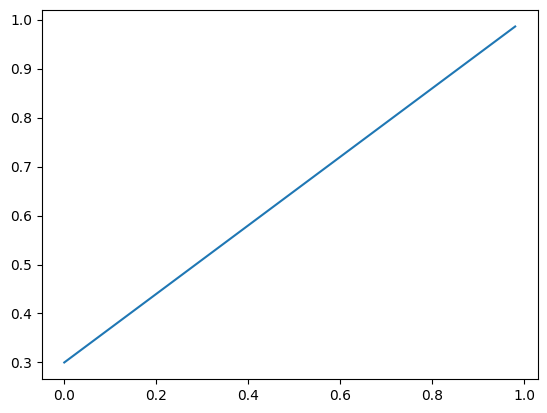

In [4]:
plt.plot(X, y)

In [5]:
len(X)

50

In [6]:
# Train and test split

X_train, y_train = X[0: int(0.8 * len(X))], y[0: int(0.8 * len(X))]
X_test, y_test = X[int(0.8 * len(X)):], y[int(0.8 * len(X)):]

In [7]:
len(X_train), len(y_train)

(40, 40)

In [8]:
len(X_test), len(y_test)

(10, 10)

In [9]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10, 7))

  # Training data
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

  # Test data
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions)

  plt.legend(prop = {"size" : 14})

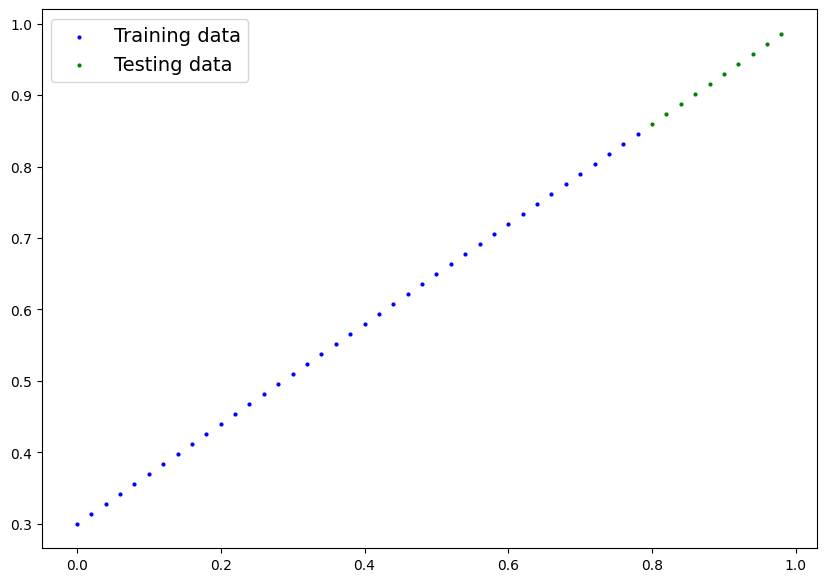

In [10]:
plot_predictions()

## 2.Build a model

Exciting!!!

What our model does:
* Start with random values (weight and bias)
* Look at the training data and adjust the random values to better represent the ideal values

How does it do so?

1. Gradient descent
2. Backpropagation

In [11]:
class LinearRegressionModel(nn.Module): #POOP (Python Object orientated programming in Python obviously...)
  # Almost everything in PyTorch inherits nn.model
  # Putting this inside the parenteses says it inherits nn.Module

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))
  # Forward method to define the computation in the nn model

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs(neural network in our case)
* torch.nn.Parameter - What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
8 torch.optim - this is where the optimizers in PyTorch live, the functions that implement gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward method

In [12]:
### Checking the contents of our PyTorch model

torch.manual_seed(42) # for reproducibility

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
weight, bias

(0.7, 0.3)

The whole point of machine learning is to get the parameters of our model to be as close as possible to the real values

### Making predictions using `torch.inference_mode()`

To check our model's power lets see how well it performs in prediction y_test based on X_test with its current values

In [15]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds
# Inference mode basically is a way to pytorch keep track of only what matters to make predictions
# It is basically faster computationaly
# Good practice to use it when making predictions

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [16]:
torch.hstack((y_preds, y_test))

tensor([[0.3982, 0.8600],
        [0.4049, 0.8740],
        [0.4116, 0.8880],
        [0.4184, 0.9020],
        [0.4251, 0.9160],
        [0.4318, 0.9300],
        [0.4386, 0.9440],
        [0.4453, 0.9580],
        [0.4520, 0.9720],
        [0.4588, 0.9860]])

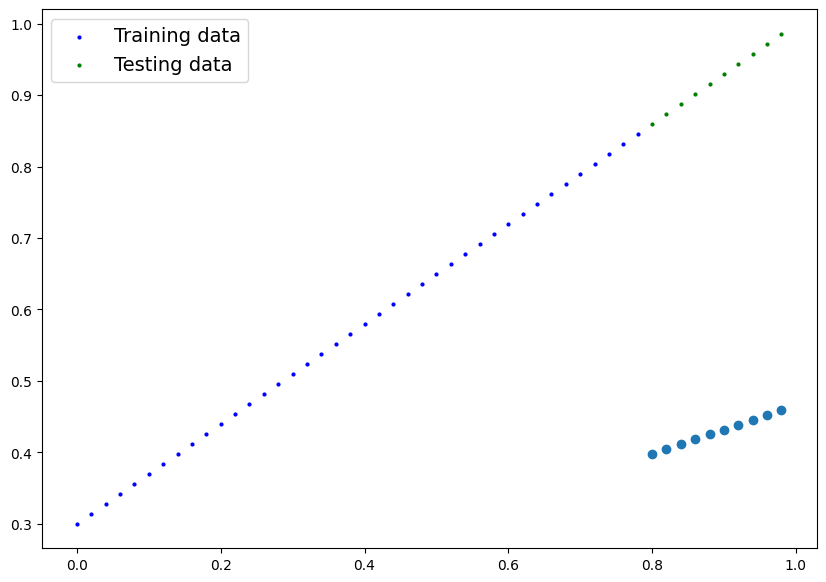

In [17]:
plot_predictions(predictions = y_preds) # The points are really far from the green dots

## 3.Train model

The idea of training is for te model to move the parameters in such a way that it better represents the data.

One way to measure how bad your module performs is using a loss function.
*Note: Loss function can be named critterion or cost function as well

**Loss function:** A function which we want to minimize, it will be our measure of how good the model is.

**Optimizer:** Takes into account the loss of a model and adjusts the model's parameters according to the gradient(I think) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [18]:
# Setting up a loss function
# For more loss functions: https://pytorch.org/docs/stable/nn.html#:~:text=Loss%20Functions,-nn.L1Loss&text=Creates%20a%20criterion%20that%20measures,input%20x%20and%20target%20y.&text=This%20criterion%20computes%20the%20cross%20entropy%20loss%20between%20input%20logits%20and%20target.

loss_fn = nn.MSELoss()

In [19]:
loss_fn # Mean absolute error (kinda crap but whatever)

MSELoss()

In [20]:
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)
# Stochastic gradient descent (the most commom)
# lr is the learning rate, the most important hyperparameter you can set
# parameters are the stuff set up randomly when creating the model, the hyperparameters are set by the developer

### Building a training loop and a testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [21]:
# An epoch is one loop through the data... (A hyperparameter)
epochs = 1000

# 0.
# Tracking for future improvement
epoch_count = []
loss_values = []
test_loss_values = []

torch.manual_seed(42)
for epoch in range(epochs):
  # Set the model to training mode in PyTorch sets all parameters that require gradient to have a gradient
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  model_0.eval() # Change mode to eval to not use things we don't need for evaluation of the model
  with torch.inference_mode(): # turns off gradient tracking and a couple more
    #1. Do forward pass
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      #print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

      #print(model_0.state_dict())



# model_0.train()
# y_pred = model_0( X_train)
# print(f"Loss: {loss_fn(y_pred, y_train)}")

In [22]:
model_0.state_dict(),

(OrderedDict([('weights', tensor([0.5998])), ('bias', tensor([0.3410]))]),)

In [23]:
len(epoch_count)

100

In [24]:
len(torch.tensor(loss_values).numpy())

100

In [25]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

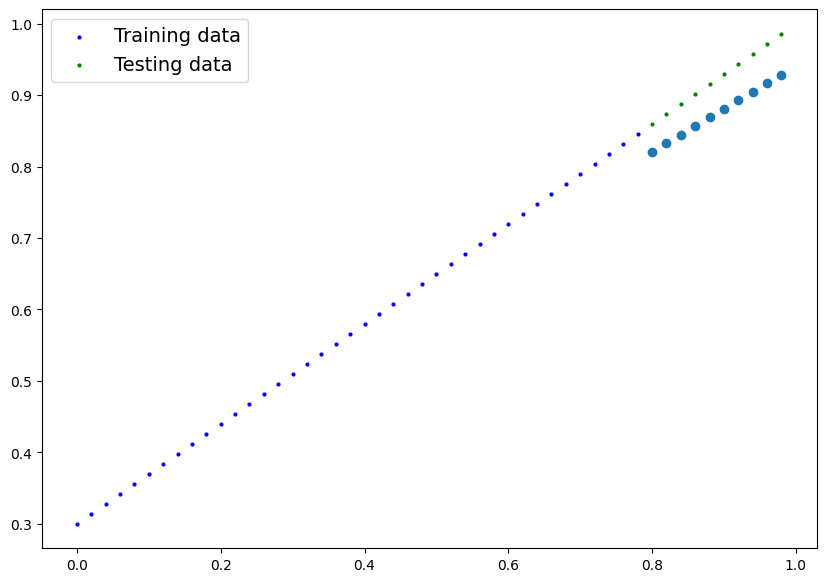

In [26]:
plot_predictions(predictions = y_preds_new)

In [27]:
import numpy as np

Text(0, 0.5, 'Loss')

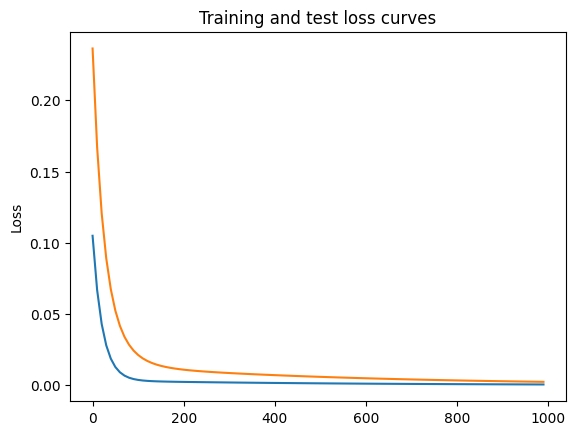

In [28]:
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch objct in pure Python's pickel format

2. `torch.load()`- allow you to load a saved PyTorch object

3. `torch.nn.Module.load_state_dict()`- this allows to laod a model's saved state dictionary

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5998])), ('bias', tensor([0.3410]))])

In [30]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [31]:
# Saving our PyTorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Saving the model's state_dict
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [32]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Aug 15 14:49 01_pytorch_workflow_model_0.pth


In [33]:
model_0_restored = LinearRegressionModel()
model_0_restored.load_state_dict(torch.load(MODEL_SAVE_PATH))
# weird
model_0_restored.eval()

LinearRegressionModel()

In [34]:
model_0_restored.state_dict()

OrderedDict([('weights', tensor([0.5998])), ('bias', tensor([0.3410]))])

In [35]:
model_0_restored.eval()
with torch.inference_mode():
  model_0_restored_preds = model_0_restored(X_test)

model_0_restored_preds

tensor([[0.8208],
        [0.8328],
        [0.8448],
        [0.8568],
        [0.8688],
        [0.8808],
        [0.8928],
        [0.9048],
        [0.9168],
        [0.9288]])

In [36]:
model_0.eval()
with torch.inference_mode():
  model_0_preds = model_0(X_test)

model_0_preds

tensor([[0.8208],
        [0.8328],
        [0.8448],
        [0.8568],
        [0.8688],
        [0.8808],
        [0.8928],
        [0.9048],
        [0.9168],
        [0.9288]])

In [37]:
model_0_preds == model_0_restored_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. Putting it all together

Lets review!!

In [38]:
# Importing PyTorch and matplotlib
import torch, matplotlib.pyplot as plt, numpy as np

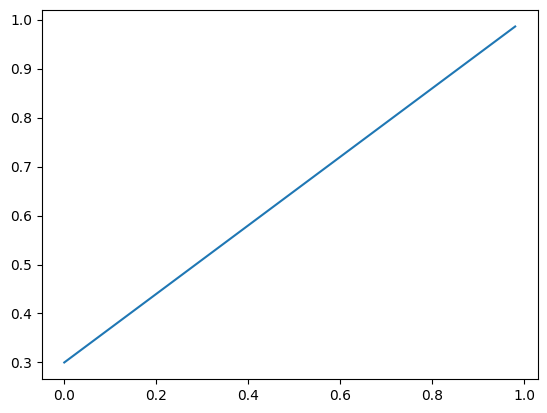

In [39]:
### 1. Data

bias = 0.3
weight = 0.7

X = torch.arange(0, 1, step = 0.02).unsqueeze(dim = 1)
y = weight * X + bias

plt.plot(X, y);

In [40]:
cut = int(len(X) * 0.8)
X_train = X[0: cut]
y_train = y[0: cut]

X_test = X[cut: len(X)]
y_test = y[cut: len(y)] # could be len(X) as well


In [41]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10, 7))

  # Training data
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

  # Test data
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions)

  plt.legend(prop = {"size" : 14})

In [42]:
#2. Build a model

In [43]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return x * self.weight + self.bias

In [44]:
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [45]:
model.eval()
with torch.inference_mode():
  y_guess = model(X_test)
torch.hstack((y_preds, y_test))

tensor([[0.3982, 0.8600],
        [0.4049, 0.8740],
        [0.4116, 0.8880],
        [0.4184, 0.9020],
        [0.4251, 0.9160],
        [0.4318, 0.9300],
        [0.4386, 0.9440],
        [0.4453, 0.9580],
        [0.4520, 0.9720],
        [0.4588, 0.9860]])

In [46]:
y_guess

tensor([[0.4179],
        [0.4226],
        [0.4273],
        [0.4320],
        [0.4367],
        [0.4413],
        [0.4460],
        [0.4507],
        [0.4554],
        [0.4601]])

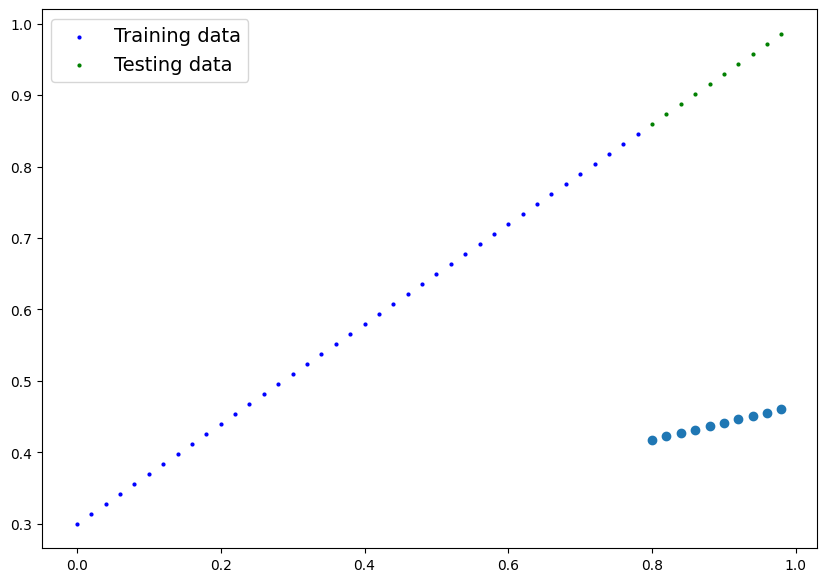

In [47]:
plot_predictions(predictions = y_guess)

In [48]:
# 3. Training the model

In [49]:
loss_fn = nn.MSELoss()

In [50]:
optimizer = torch.optim.SGD(lr = 0.01,
                                 params = model.parameters())

In [51]:
# Training loop
epochs = 1000

train_losses = []
test_losses = []
epoch_list = []


for epoch in range(epochs):
  # Training loop
  model.train()

  y_preds = model.forward(X_train)
  #print(torch.hstack((y_preds, y_train)))
  loss = loss_fn(y_preds, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Evaluation loop

  with torch.inference_mode():
    model.eval()

    y_test_pred = model.forward(y_test)
    test_loss = loss_fn(y_test_pred, y_test)

    train_losses.append(loss)
    test_losses.append(test_loss)
    epoch_list.append(epoch)



In [52]:
# Saving our PyTorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Saving the model's state_dict
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

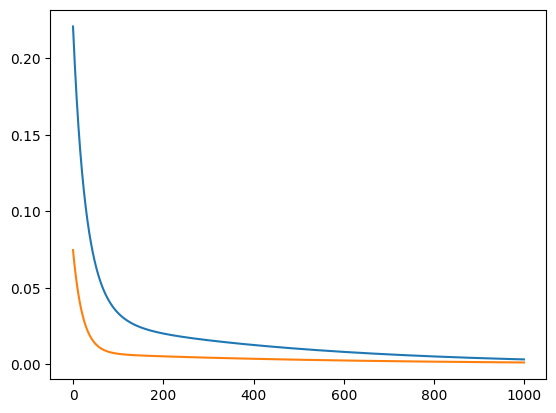

In [52]:
plt.plot(epoch_list, test_losses)
plt.plot(epoch_list, torch.tensor(train_losses).numpy())

In [56]:
from pathlib import Path

MODEL_NAME = "01_pytorch_workflow meu modelo"
MODEL_SAVE_PATH = "models/"+MODEL_NAME
torch.save(model.state_dict(), MODEL_SAVE_PATH)
